In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/minuteActivity_merged (File 2 for Minute).csv")

df.head()

,Id,ActivityMinute,Intensity,Calories,METs,value,logId,Steps
0,1503960366,04-12-2016 00:00,0,0.7865,10,3.0,1.138056e+10,0.0
1,1503960366,04-12-2016 00:01,0,0.7865,10,2.0,1.138056e+10,0.0
2,1503960366,04-12-2016 00:02,0,0.7865,10,1.0,1.138056e+10,0.0
3,1503960366,04-12-2016 00:03,0,0.7865,10,1.0,1.138056e+10,0.0
4,1503960366,04-12-2016 00:04,0,0.7865,10,1.0,1.138056e+10,0.0


In [ ]:
df.tail()

,Id,ActivityMinute,Intensity,Calories,METs,value,logId,Steps
162369,1844505072,05-04-2016 17:09,0,0.9357,10,1.0,1.154505e+10,0.0
162370,1844505072,05-04-2016 17:10,0,0.9357,10,1.0,1.154505e+10,0.0
162371,1844505072,05-04-2016 17:11,0,0.9357,10,1.0,1.154505e+10,0.0
162372,1844505072,05-04-2016 17:12,0,0.9357,10,1.0,1.154505e+10,0.0
162373,1844505072,05-04-2016 17:13,0,0.9357,1,NaN,NaN,NaN


In [ ]:
df.shape

(162374, 8)

In [ ]:
df.describe()

,Id,Intensity,Calories,METs,value,logId,Steps
count,1.623740e+05,162374.000000,162374.000000,162374.000000,162373.000000,1.623730e+05,162373.000000
mean,1.642125e+09,0.175570,1.382804,14.018303,1.099727,1.149543e+10,5.221829
std,1.157355e+08,0.477131,1.106712,10.650686,0.334134,6.808795e+07,18.749429
min,1.503960e+09,0.000000,0.000000,0.000000,1.000000,1.137223e+10,0.000000
25%,1.503960e+09,0.000000,0.831000,10.000000,1.000000,1.143931e+10,0.000000
50%,1.624580e+09,0.000000,0.935700,10.000000,1.000000,1.149833e+10,0.000000
75%,1.644430e+09,0.000000,1.405300,12.000000,1.000000,1.155088e+10,0.000000
max,1.844505e+09,3.000000,11.804520,111.000000,3.000000,1.161625e+10,184.000000


In [ ]:
df.columns

Index(['Id', 'ActivityMinute', 'Intensity', 'Calories', 'METs', 'value',
       'logId', 'Steps'],
      dtype='object')

In [ ]:
#changing all the proper camel-case names to lowercase
df.rename({'Id': 'ID', 'ActivityMinute': 'activity minute', 'Intensity': 'intensity',
           'Calories': 'calories', 'METs': 'METs', 'value': 'value', 'logId': 'loginid', 'Steps': 'steps'}, axis=1, inplace=True)

df.columns

Index(['ID', 'activity minute', 'intensity', 'calories', 'METs', 'value',
       'loginid', 'steps'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162374 entries, 0 to 162373
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               162374 non-null  int64  
 1   activity minute  162374 non-null  object 
 2   intensity        162374 non-null  int64  
 3   calories         162374 non-null  float64
 4   METs             162374 non-null  int64  
 5   value            162373 non-null  float64
 6   loginid          162373 non-null  float64
 7   steps            162373 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 9.9+ MB


In [ ]:
#convert "activity minute" column to datetime data type
df['activity minute'] = pd.to_datetime(df['activity minute'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162374 entries, 0 to 162373
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ID               162374 non-null  int64         
 1   activity minute  162374 non-null  datetime64[ns]
 2   intensity        162374 non-null  int64         
 3   calories         162374 non-null  float64       
 4   METs             162374 non-null  int64         
 5   value            162373 non-null  float64       
 6   loginid          162373 non-null  float64       
 7   steps            162373 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 9.9 MB


In [ ]:
df.nunique()

ID                     4
activity minute    44160
intensity              4
calories             232
METs                  80
value                  3
loginid              399
steps                182
dtype: int64

In [ ]:
df.isnull().sum()

ID                 0
activity minute    0
intensity          0
calories           0
METs               0
value              1
loginid            1
steps              1
dtype: int64

In [ ]:
#filling values of value and steps with mode values and dropping missing value of loginid
mode = df['value'].mode()[0]
df['value']= df['value'].replace(np.nan, mode)

mode = df['steps'].mode()[0]
df['steps']= df['steps'].replace(np.nan, mode)

df.isnull().sum()

ID                 0
activity minute    0
intensity          0
calories           0
METs               0
value              0
loginid            1
steps              0
dtype: int64

In [ ]:
#dropping 1 missing value of loginid because it cannot be replaced by any arbitary value
df = df.dropna(axis=1)

print(df.isnull().sum())
df.shape
df.columns

ID                 0
activity minute    0
intensity          0
calories           0
METs               0
value              0
steps              0
dtype: int64


Index(['ID', 'activity minute', 'intensity', 'calories', 'METs', 'value',
       'steps'],
      dtype='object')

**DATA VISUALISATION**

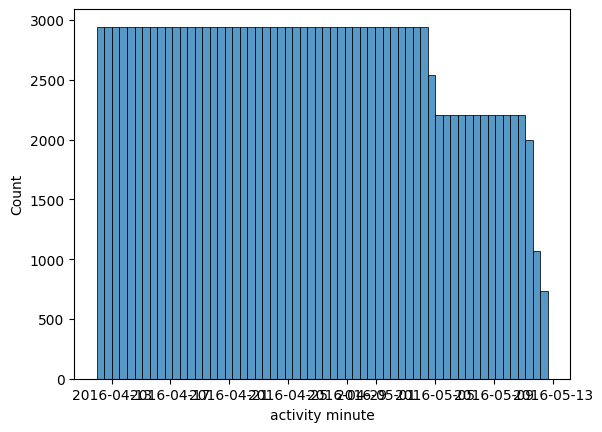

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x='activity minute', data=df, )
plt.show()

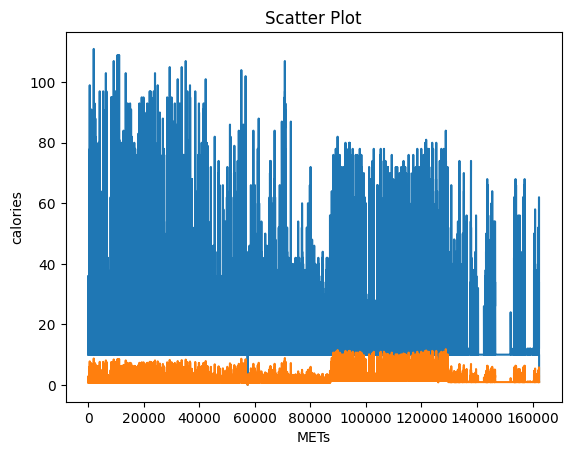

In [ ]:
#scatterplot with METs against calories
plt.plot(df['METs'])
plt.plot(df['calories'])

plt.title("Scatter Plot")

plt.xlabel('METs')
plt.ylabel('calories')

plt.show()

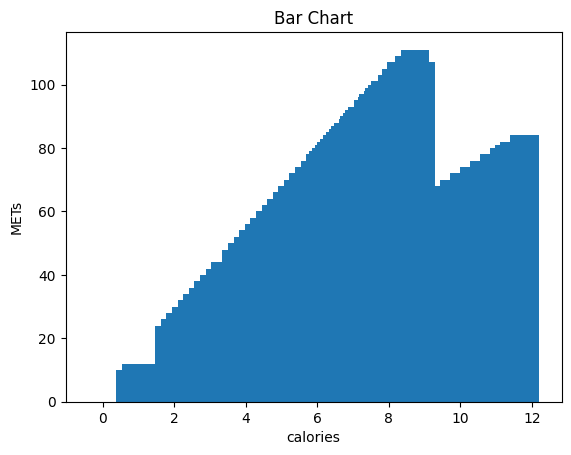

In [35]:
#Q. How many calories were burned in METs.
#let's show it with the help of a bar chart

plt.bar(df['calories'], df['METs'])

plt.title("Bar Chart")

plt.xlabel('calories')
plt.ylabel('METs')

plt.show()